# More To Come. Stay Tuned. !!
In this Notrebook, I did  Google Landmark Retrieval Exploratory Analysis.
If there are any suggestions/changes you would like to see in the Kernel please let me know :). Appreciate every ounce of help!

This notebook will always be a work in progress. Please leave any comments about further improvements to the notebook! Any feedback or constructive criticism is greatly appreciated!.
** If you like it or it helps you , you can upvote and/or leave a comment :).**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [2]:
train_data = pd.read_csv('../data/index.csv')
test_data = pd.read_csv('../data/test.csv')
submission = pd.read_csv("../data/sample_submission.csv")

In [3]:
print("Training data size",train_data.shape)
print("test data size",test_data.shape)

Training data size (1098461, 2)
test data size (117703, 2)


In [4]:
train_data.head()

id                                                url
0  b09ea096f4daa42e  https://lh5.googleusercontent.com/-wBt6sklzbGs...
1  6648383c7b3a438c  https://lh3.googleusercontent.com/-OADWsOZq83E...
2  d485d9f770e40453  https://lh5.googleusercontent.com/-vtZFUTuFWGM...
3  e7cdfba9ec7e9dd5  https://lh4.googleusercontent.com/-Skq6Q-VUALk...
4  44806beb654e6410  https://lh4.googleusercontent.com/-6eIkjkr3j2w...

In [5]:
test_data.head()

id                                                url
0  000088da12d664db  https://lh3.googleusercontent.com/-k45wfamuhT8...
1  0001623c6d808702  https://lh3.googleusercontent.com/-OQ0ywv8KVIA...
2  0001bbb682d45002  https://lh3.googleusercontent.com/-kloLenz1xZk...
3  0002362830cfe3a3  https://lh3.googleusercontent.com/-N6z79jNZYTg...
4  000270c9100de789  https://lh3.googleusercontent.com/-keriHaVOq1U...

In [6]:
submission.head()

id                                             images
0  000088da12d664db  0370c4c856f096e8 766677ab964f4311 e3ae4dcee813...
1  0001623c6d808702  b01175326ee19742 67eb4fc9ff184bd2 0f775e72c031...
2  0001bbb682d45002  5101d06f891261be ae9c548dcf7102e2 a42098eb2dd3...
3  0002362830cfe3a3  40cb31b754bb7249 f860d7fbb0073fab 492c16c0584d...
4  000270c9100de789  fe3a62d9b50ca221 5005114ed61af1bc 754e137d888d...

In [7]:
# now open the URL
temp = 4444
print('id', train_data['id'][temp])
print('url:', train_data['url'][temp])

id 731bf321dc92bdfc
url: https://lh4.googleusercontent.com/-gQEUjiYZrAA/UhcFIFIAJXI/AAAAAAAAE_o/yZ_s7e_zWvg/s1600/


In [8]:
# missing data in training data 
total = train_data.isnull().sum().sort_values(ascending = False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending = False)
missing_train_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_train_data.head()

Total  Percent
url      0      0.0
id       0      0.0

In [9]:
# missing data in test data 
total = test_data.isnull().sum().sort_values(ascending = False)
percent = (test_data.isnull().sum()/test_data.isnull().count()).sort_values(ascending = False)
missing_test_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_test_data.head()

Total  Percent
url      0      0.0
id       0      0.0

## Lets display some images from URLs

In [10]:
from IPython.display import Image
from IPython.core.display import HTML, display

def display_category(urls, category_name):
    img_style = "width: 180px; margin: 0px; float: left; border: 1px solid black;"
    images_list = ''.join([f"<img style='{img_style}' src='{u}' />" for _, u in urls.head(12).iteritems()])

    display(HTML(images_list))

In [11]:
category = train_data['id'].value_counts().keys()[0]
urls = train_data[train_data['id'] == category]['url']
display_category(urls, "")

In [12]:
category = train_data['id'].value_counts().keys()[1]
urls = train_data[train_data['id'] == category]['url']
display_category(urls, "")

## Lets see unique URL

In [13]:
# Unique URL's
train_data.nunique()

id     1098461
url    1098461
dtype: int64

## All URLs are unique.

## Now Lets extract the website names and see their occurances

In [14]:
# Extract site_names for train data
temp_list = list()
for path in train_data['url']:
    temp_list.append((path.split('//', 1)[1]).split('/', 1)[0])
train_data['site_name'] = temp_list
# Extract site_names for test data
temp_list = list()
for path in test_data['url']:
    temp_list.append((path.split('//', 1)[1]).split('/', 1)[0])
test_data['site_name'] = temp_list

### We have added one new column "site_name". lets see

In [15]:
print("Training data size",train_data.shape)
print("test data size",test_data.shape)

Training data size (1098461, 3)
test data size (117703, 3)


In [16]:
train_data.head(8)

id                                                url  \
0  b09ea096f4daa42e  https://lh5.googleusercontent.com/-wBt6sklzbGs...   
1  6648383c7b3a438c  https://lh3.googleusercontent.com/-OADWsOZq83E...   
2  d485d9f770e40453  https://lh5.googleusercontent.com/-vtZFUTuFWGM...   
3  e7cdfba9ec7e9dd5  https://lh4.googleusercontent.com/-Skq6Q-VUALk...   
4  44806beb654e6410  https://lh4.googleusercontent.com/-6eIkjkr3j2w...   
5  bbecba89db6a9bec  https://lh5.googleusercontent.com/-NIQkGN6FRuw...   
6  b03b500b28655072  http://lh5.ggpht.com/-aHODQcvDw30/S-g3zWUjSZI/...   
7  f3ba87e473810669  https://lh3.googleusercontent.com/-2-gT2aJmcJ4...   

                   site_name  
0  lh5.googleusercontent.com  
1  lh3.googleusercontent.com  
2  lh5.googleusercontent.com  
3  lh4.googleusercontent.com  
4  lh4.googleusercontent.com  
5  lh5.googleusercontent.com  
6              lh5.ggpht.com  
7  lh3.googleusercontent.com

In [17]:
test_data.head()

id                                                url  \
0  000088da12d664db  https://lh3.googleusercontent.com/-k45wfamuhT8...   
1  0001623c6d808702  https://lh3.googleusercontent.com/-OQ0ywv8KVIA...   
2  0001bbb682d45002  https://lh3.googleusercontent.com/-kloLenz1xZk...   
3  0002362830cfe3a3  https://lh3.googleusercontent.com/-N6z79jNZYTg...   
4  000270c9100de789  https://lh3.googleusercontent.com/-keriHaVOq1U...   

                   site_name  
0  lh3.googleusercontent.com  
1  lh3.googleusercontent.com  
2  lh3.googleusercontent.com  
3  lh3.googleusercontent.com  
4  lh3.googleusercontent.com

### occurances of sites in train_data

In [18]:
# Occurance of site in decreasing order(Top categories)
temp = pd.DataFrame(train_data.site_name.value_counts())
temp.reset_index(inplace=True)
temp.columns = ['site_name','count']
temp

site_name   count
0                         lh3.googleusercontent.com  162104
1                         lh4.googleusercontent.com  158798
2                         lh5.googleusercontent.com  156027
3                         lh6.googleusercontent.com  152010
4                                     lh3.ggpht.com   96044
5                                     lh4.ggpht.com   93126
6                                     lh6.ggpht.com   92889
7                                     lh5.ggpht.com   92173
8                                    mw2.google.com   83782
9                              static.panoramio.com   10932
10                 commondatastorage.googleapis.com     570
11                       1-ps.googleusercontent.com       1
12                                       c.qyer.com       1
13                                      i99.beon.ru       1
14                                         gblor.ru       1
15  images-onepick-opensocial.googleusercontent.com       1
16                                       c.avsim.su       1

### As we can see there are total 17 unique sites.

/home/max/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


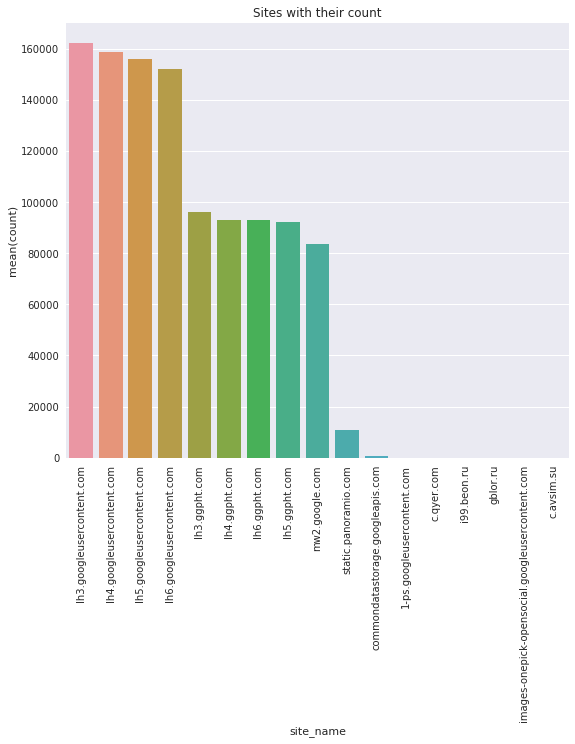

In [20]:
# Plot the Sites with their count
plt.figure(figsize = (9, 8))
plt.title('Sites with their count')
sns.set_color_codes("pastel")
sns.barplot(x="site_name", y="count", data=temp,
            label="Count")
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

### occurances of sites in test_data

In [31]:
# Occurance of site in decreasing order(Top categories)
temp = pd.DataFrame(test_data.site_name.value_counts())
temp.reset_index(inplace=True)
temp.columns = ['site_name','count']
temp

site_name   count
0                         lh3.googleusercontent.com  116855
1                                     lh3.ggpht.com     166
2                                     lh5.ggpht.com     134
3                                     lh4.ggpht.com     123
4    images1-focus-opensocial.googleusercontent.com     102
5                                     lh6.ggpht.com      92
6                         lh5.googleusercontent.com      80
7                         lh4.googleusercontent.com      55
8                              static.panoramio.com      47
9                         lh6.googleusercontent.com      28
10   images2-focus-opensocial.googleusercontent.com       3
11                                     img06.rl0.ru       2
12  images-onepick-opensocial.googleusercontent.com       2
13                                     img02.rl0.ru       2
14                                     img01.rl0.ru       2
15                                     img08.rl0.ru       1
16                                1.bp.blogspot.com       1
17                                  a.disquscdn.com       1
18                                cdn.champbell.net       1
19                                     img07.rl0.ru       1
20  images-blogger-opensocial.googleusercontent.com       1
21                                  jiu-jitsu-mo.ru       1
22                                     img09.rl0.ru       1
23                                cdn.photogyps.com       1
24                                   extreme.com.ua       1

### Total unique sites are 25 in test data and some are different from train_data

In [32]:
# Plot the Sites with their count
plt.figure(figsize = (9, 8))
plt.title('Sites with their count')
sns.set_color_codes("pastel")
sns.barplot(x="site_name", y="count", data=temp,
            label="Count")
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

/home/max/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


### As we can see that most of the images are taken from one site only.

### Now make a random sample of few training images for developing a download program

In [38]:
sample = train_data[['id', 'url']].sample(100)

In [40]:
sample.to_csv('../data/train_sample.csv', index=False)

# Exploratory analysis of downloaded images

Not all images from the list could be downloaded because they are no longer available (deleted at source maybe). Before continuing with the modellling, we must check what are these missing images, what categories they belong to, what servers they were hosted, etc

First, create a list of images 